In [1]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import gmaps.datasets


In [2]:
corrected_data_path = "Resources3/FullDataSet.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,Date,Month Abbr,State,Number of Flights,Positive,Deaths,Total Tested
0,2020-08-24,Aug,Maryland,281,104669,3694,1794703
1,2020-08-25,Aug,Maryland,254,105046,3707,1807573
2,2020-08-26,Aug,Maryland,263,105486,3717,1819950
3,2020-08-27,Aug,Maryland,289,106063,3722,1841425
4,2020-08-28,Aug,Maryland,252,106664,3736,1868927
...,...,...,...,...,...,...,...
1495,2020-10-18,Oct,Virginia,515,166138,3433,2386778
1496,2020-10-19,Oct,Virginia,433,166828,3457,2398111
1497,2020-10-20,Oct,Virginia,381,167754,3485,2411940
1498,2020-10-21,Oct,Virginia,372,168772,3515,2431736


Text(0, 0.5, 'Counts')

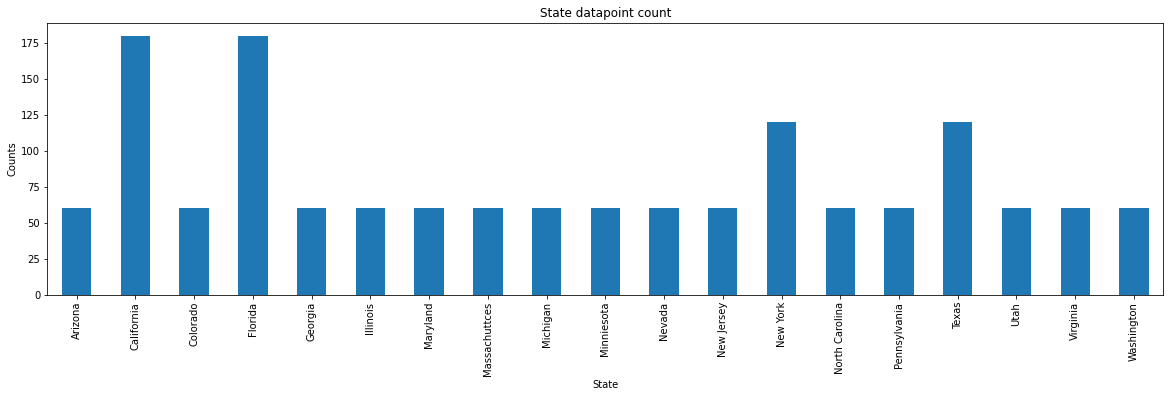

In [3]:
#total number of datapoint per state (to check the number of data points are fairly simimral )
state_gb = corrected_data_df.groupby(["State"])
count_st = state_gb.count()["Total Tested"]
count_chart= count_st.plot(kind= "bar", figsize=(20,5))
plt.title("State datapoint count")
count_chart.set_ylabel("Counts")


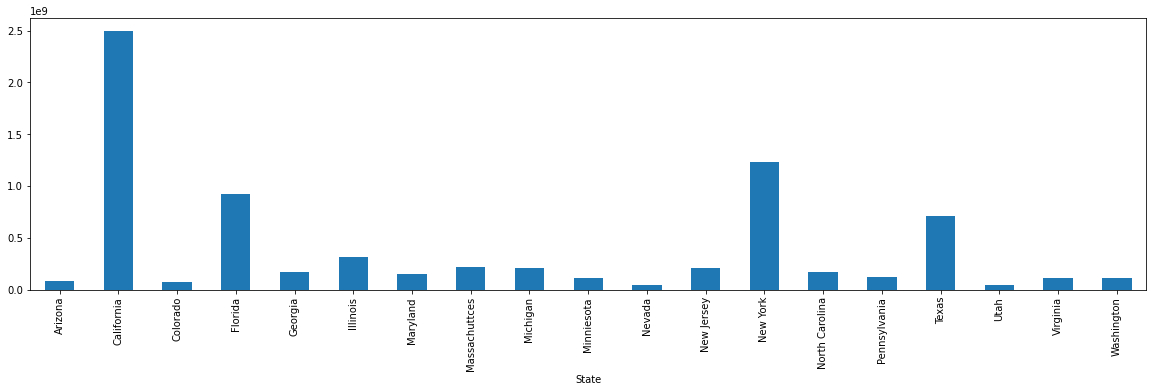

In [4]:
#total number of infected people per state in a year
state_gb = corrected_data_df.groupby(["State"])
state_count = state_gb.sum()["Total Tested"]
state_count.head(12)
count_chart = state_count.plot(kind = "bar", figsize= (20,5))
plt.show()

In [5]:
infected_groups = corrected_data_df.groupby(["State", "Month Abbr"])
sum_it_up = infected_groups.sum()
sum_it_up.head(15)

Number of Flights  Positive   Deaths  Total Tested
State      Month Abbr                                                    
Arizona    Aug                      3761   1602726    39432       9428310
           Oct                     10715   4977569   126862      34483635
           Sep                     13015   6319710   161364      39968537
California Aug                     15458  16473087   302184     263674698
           Oct                     39250  55907673  1091622    1061988921
           Sep                     53132  68570967  1306107    1172623452
Colorado   Aug                      6976    449657    14664       7761001
           Oct                     18915   1727963    44122      34039627
           Sep                     22788   1883372    56958      34568618
Florida    Aug                      7104  14726730   264228     108785691
           Oct                     20875  48581931  1026381     367350126
           Sep                     23950  60325428  1171596     448840884
Georgia    Aug                     15694   2110845    43405      18224056
           Oct                     46489   7303564   162976      69513132
           Sep                     57426   8925277   192621      79647001

what state?Florida


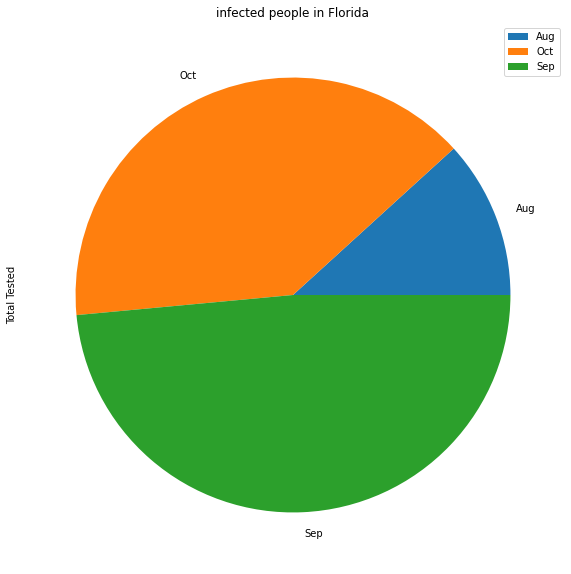

In [8]:
#just one state monthly

state_name = input("what state?")
#state_code = "CA"
just_one_state = sum_it_up.loc[state_name]
state_pie = just_one_state.plot(kind ="pie", y= "Total Tested", title= ("infected people in " + state_name), figsize= (10,10))
state_pie.set_ylabel("Total Tested")

plt.show()
#plt.axis("equal")

In [11]:
reduced_data = corrected_data_df[["State", "Month Abbr", "Total Tested"]]
reduced_data
month_list = reduced_data["Month Abbr"].unique()
month_list
state_list = reduced_data["State"].unique()
state_list
month_gb = reduced_data.groupby(["Month Abbr"])
sum_month = month_gb.sum()
sum_month.head

,Total Tested
Month Abbr,
Aug,795194969
Oct,3194590192
Sep,3516577799


In [12]:
#which month has the highest number of infected people
reduced_data


,State,Month Abbr,Total Tested
0,Maryland,Aug,1794703
1,Maryland,Aug,1807573
2,Maryland,Aug,1819950
3,Maryland,Aug,1841425
4,Maryland,Aug,1868927
...,...,...,...
1495,Virginia,Oct,2386778
1496,Virginia,Oct,2398111
1497,Virginia,Oct,2411940
1498,Virginia,Oct,2431736


In [17]:
#not working ?????????????????????????
for state in state_list:
    for month in month_list:
    
        state_data = reduced_data[( reduced_data["state"] == state)& (reduced_data["month"]== month)]
        state_data_gb = state_data.groupby(["state", "infected"])

        state_data_df = state_data_gb["infected"].sum().to_frame()
state_data_df.head(10)
        #state_data_index= state_data_df.unstack(0)
        #state_data_plot = state_data_index["infected"]
########### 

        #plt.figure()


        #plot_cap, = plt.plot(state_list, state_data_plot["CA"])

,,infected
state,infected,
MP,13,13


In [24]:
state_data = reduced_data[( reduced_data["state"] == "NJ")]
        
                          #state_data_gb = state_data.groupby(["state", "infected"])

       # state_data_df = state_data_gb["infected"].sum().to_frame()
state_data.head(10)
month_list = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
month_num = [1,2,3,4,5,6,7,8,9,10,11,12]
#state_data.sort_values("month")
state_data_ordered= pd.Categorical(state_data['month'].month.apply(mapper),
               categories=month_list,
               ordered=True)
state_data_ordered

AttributeError: 'Series' object has no attribute 'month'

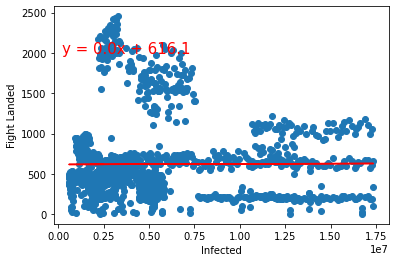

In [23]:
infected_values = corrected_data_df["Total Tested"]
flights_values = corrected_data_df["Number of Flights"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(infected_values, flights_values)
regress_values = infected_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(infected_values,flights_values)


plt.plot(infected_values,regress_values,"r-")
plt.annotate(line_eq,(200000,2000),fontsize=15,color="red")
plt.xlabel('Infected')
plt.ylabel('Fight Landed')
plt.show()

In [24]:
correlation = st.pearsonr(corrected_data_df["Total Tested"], corrected_data_df["Number of Flights"])
print(correlation)

(0.006163514872813001, 0.8114815531474738)
